In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics     
from xgboost import XGBClassifier 

In [2]:
df = pd.read_excel("wine_quality.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


# DATA INFO

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [5]:
#checking for the null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [6]:
#removing the null values
df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].median(), inplace = True)
df.loc[:,"pH"].fillna(df['pH'].median(), inplace = True)
df.loc[: , "quality"].fillna( df['quality'].median() , inplace = True )
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

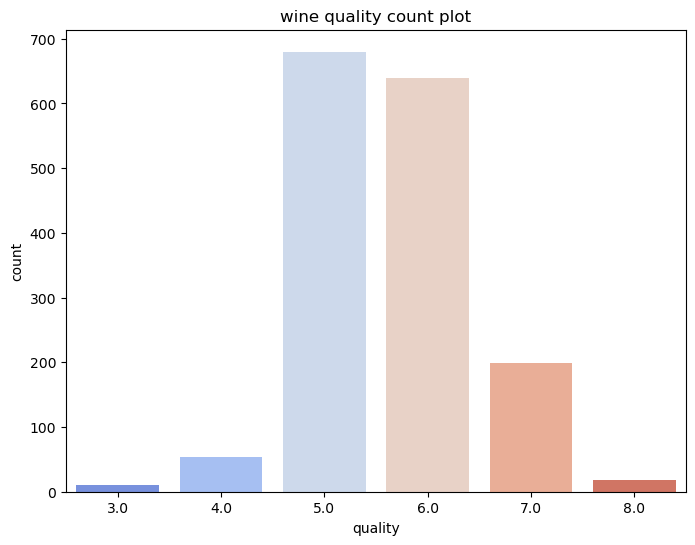

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df['quality'] , palette = 'coolwarm')
plt.title('wine quality count plot')
plt.show()

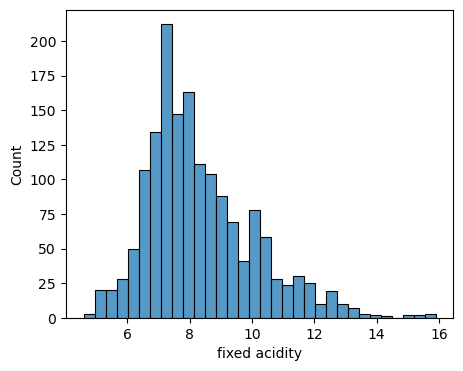

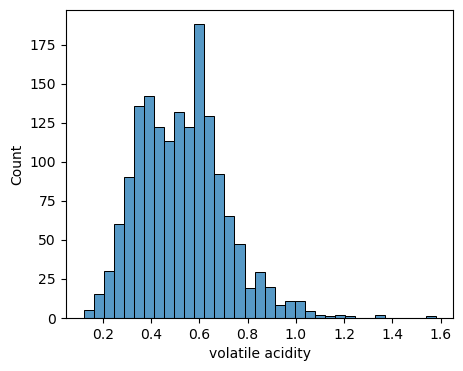

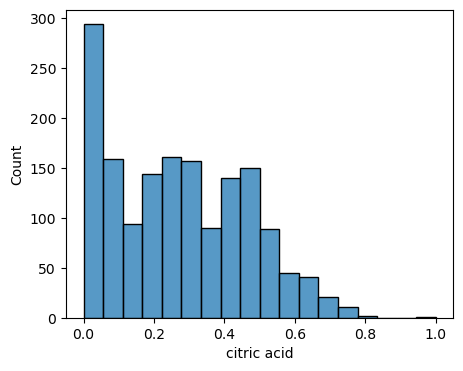

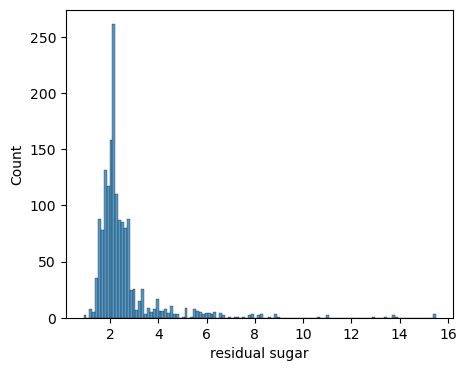

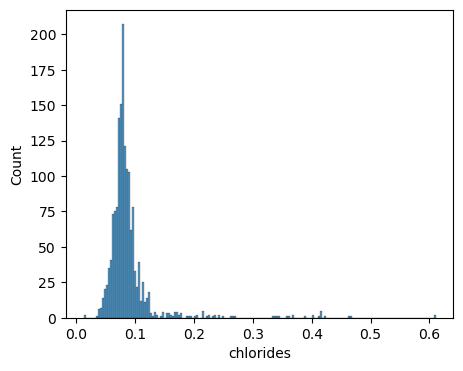

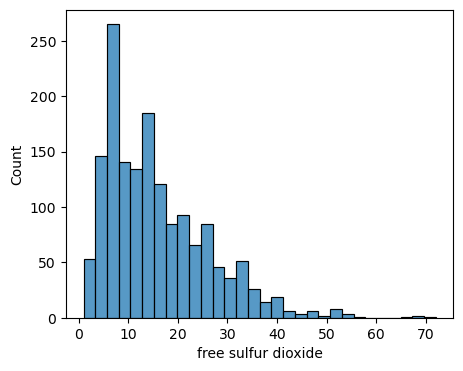

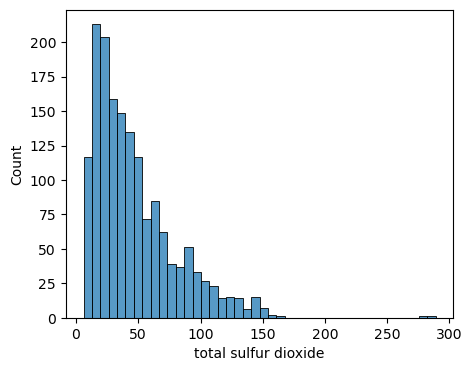

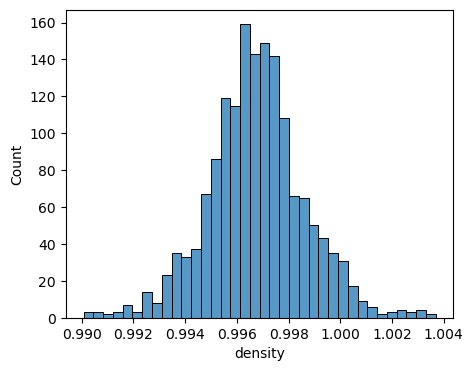

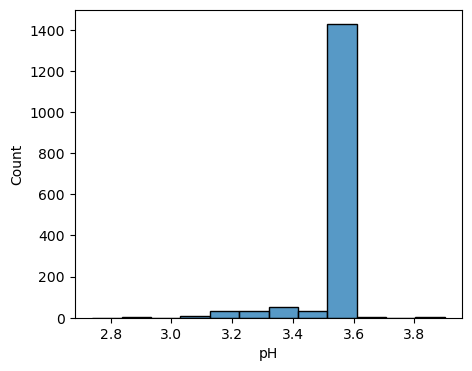

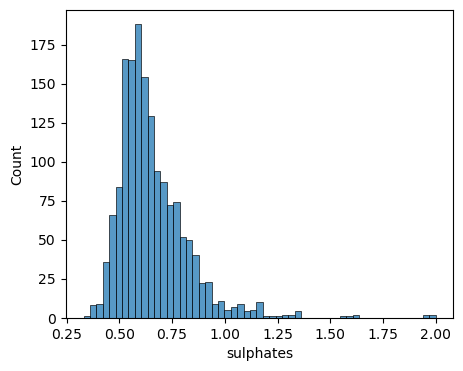

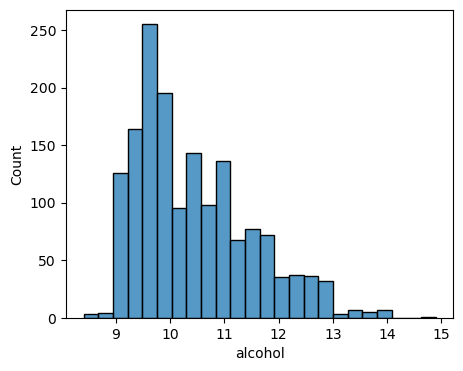

In [8]:
#Writing the function for plotting histogram for the column
def histo(col):
    plt.figure(figsize = (5,4))
    sns.histplot(data = df , x = col )
    plt.show()

for i in df.columns[0 : len(df.columns) - 1]:
    histo(i)

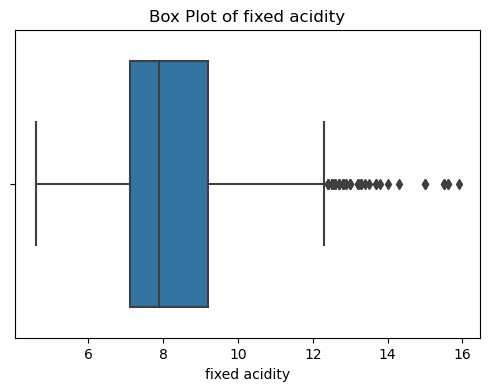

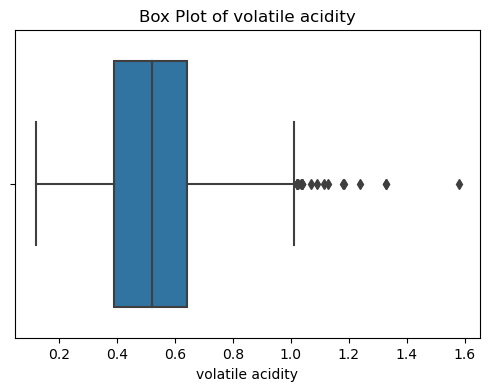

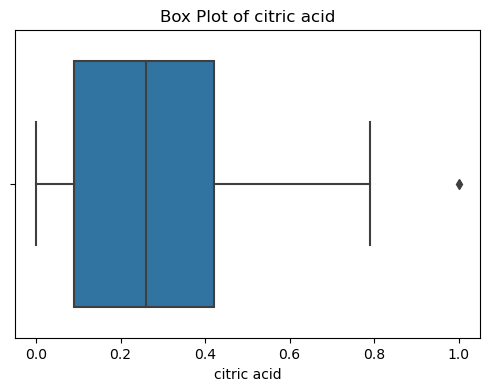

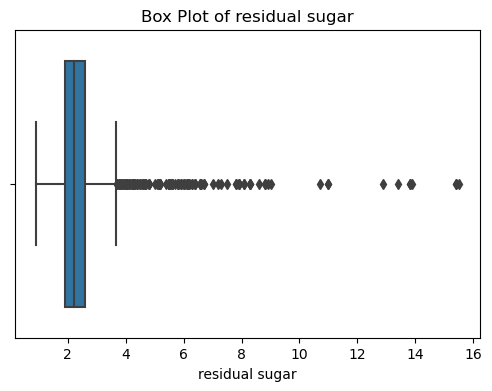

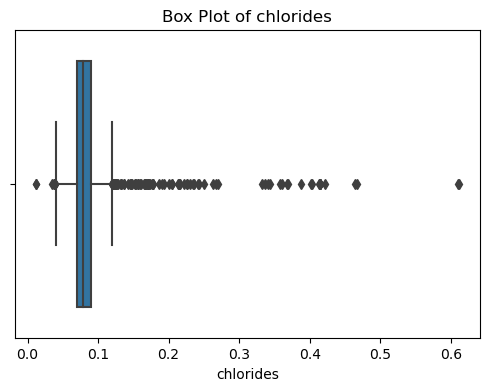

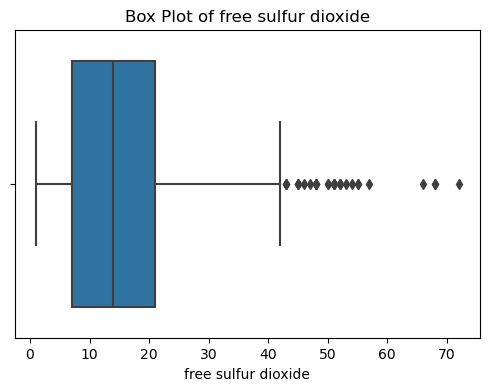

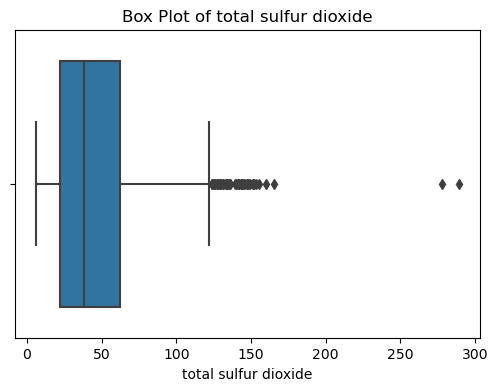

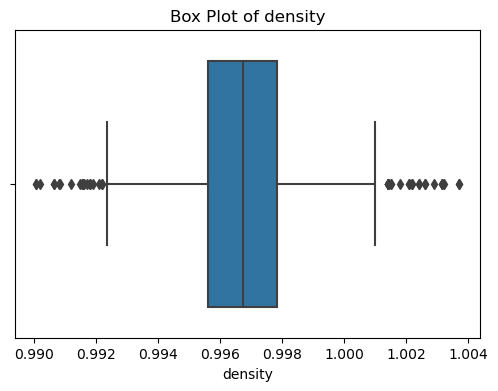

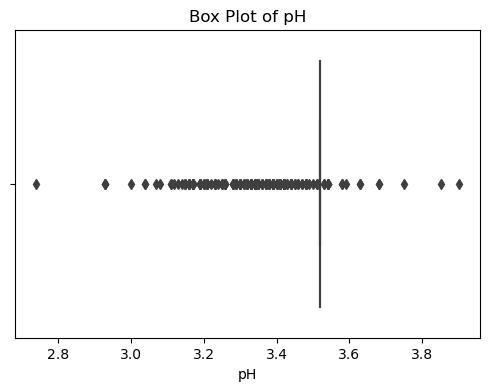

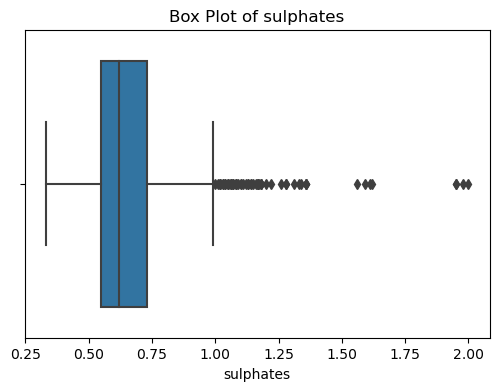

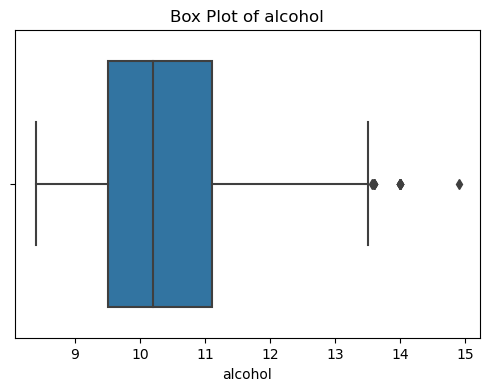

In [9]:
#plotting the box plot for the columns
def boxplot(column):
    plt.figure(figsize = (6,4))
    sns.boxplot(data =df , x = column )
    plt.title("Box Plot of " + column)

for i in df.columns[0:len(df.columns) - 1]:
    boxplot(i)


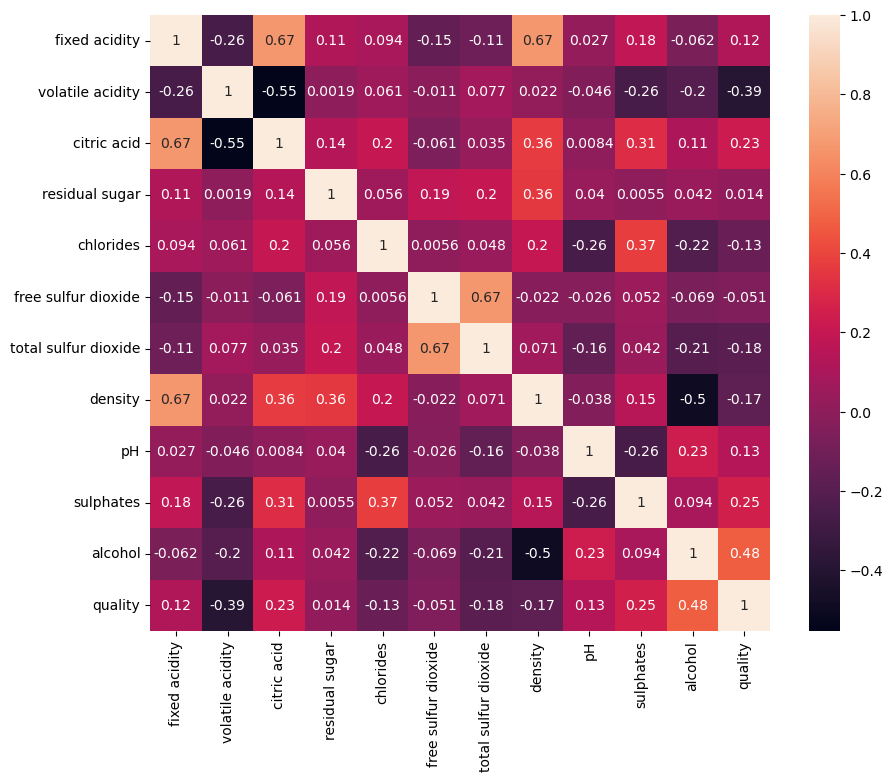

In [10]:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr , annot = True)
plt.show()

# Feature Engineering

In [11]:
bins = [3,6,8]
df['quality'] = pd.cut(df['quality'] , bins = bins , labels = ['bad','good'])

In [12]:
df['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

<AxesSubplot:xlabel='quality', ylabel='count'>

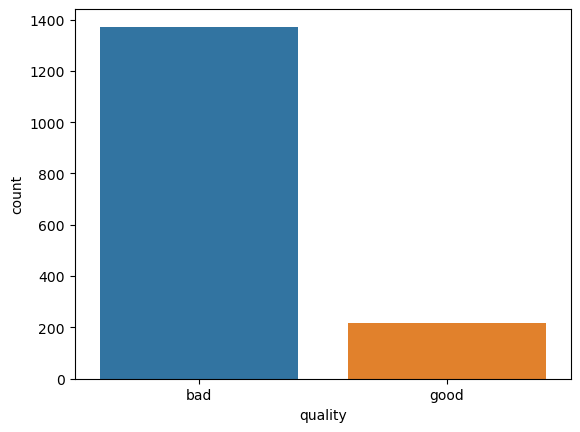

In [13]:
sns.countplot(data = df , x = 'quality')

In [14]:
df['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [15]:
#processing the data
df['quality'] = np.where(df['quality'] == "good",1,0)

In [16]:
#preperation of the dataset
X = df.drop(columns = {'quality'})

In [17]:
Y = df['quality'].values

In [18]:
#Dividing the training data into train and test
X_TRAIN , X_TEST , Y_TRAIN , Y_TEST  = train_test_split(X , Y , random_state = 42, test_size = 0.2)

In [19]:
scaler = MinMaxScaler()
X_TRAIN_SCALED = scaler.fit_transform(X_TRAIN)
X_TEST_SCALED = scaler.fit_transform(X_TEST)

In [20]:
#Converting into dataframe
X_TRAIN_DF = pd.DataFrame(X_TRAIN_SCALED, columns = X_TRAIN.columns )
X_TEST_DF = pd.DataFrame(X_TEST_SCALED, columns = X_TEST.columns )


# Model Selection

In [30]:
#Logistic Model 
alg1 = LogisticRegression()
alg1.fit(X_TRAIN_DF , Y_TRAIN)
Y_TRAIN_PRED = alg1.predict(X_TRAIN )
Y_TEST_PRED = alg1.predict(X_TEST )

#Calculating the scores
ROC_AUC_Score_train = metrics.roc_auc_score(Y_TRAIN , Y_TRAIN_PRED)
Precision_Score_train = metrics.precision_score(Y_TRAIN , Y_TRAIN_PRED)
Recall_Score_train = metrics.recall_score(Y_TRAIN , Y_TRAIN_PRED)
Accuracy_Score_train = metrics.accuracy_score(Y_TRAIN , Y_TRAIN_PRED)
F1_Score_train = metrics.f1_score(Y_TRAIN , Y_TRAIN_PRED)

#testing score
ROC_AUC_Score_test = metrics.roc_auc_score(Y_TEST , Y_TEST_PRED)
Precision_Score_test = metrics.precision_score(Y_TEST , Y_TEST_PRED)
Recall_Score_test = metrics.recall_score(Y_TEST , Y_TEST_PRED)
Accuracy_Score_test = metrics.accuracy_score(Y_TEST , Y_TEST_PRED)
F1_Score_test = metrics.f1_score(Y_TEST , Y_TEST_PRED)

In [36]:
#XGBoost Model
alg2 = XGBClassifier()
alg2.fit(X_TRAIN_DF , Y_TRAIN)
Y_TRAIN_PRED_2 = alg2.predict (X_TRAIN ) 
Y_TEST_PRED_2 = alg2.predict(X_TEST )
#Calculating the scores
ROC_AUC_Score_train_2 = metrics.roc_auc_score(Y_TRAIN , Y_TRAIN_PRED_2)
Precision_Score_train_2 = metrics.precision_score(Y_TRAIN , Y_TRAIN_PRED_2)
Recall_Score_train_2 = metrics.recall_score(Y_TRAIN , Y_TRAIN_PRED_2)
Accuracy_Score_train_2 = metrics.accuracy_score(Y_TRAIN , Y_TRAIN_PRED_2)
F1_Score_train_2 = metrics.f1_score(Y_TRAIN , Y_TRAIN_PRED_2)

#testing score
ROC_AUC_Score_test_2 = metrics.roc_auc_score(Y_TEST , Y_TEST_PRED_2)
Precision_Score_test_2 = metrics.precision_score(Y_TEST , Y_TEST_PRED_2)
Recall_Score_test_2 = metrics.recall_score(Y_TEST , Y_TEST_PRED_2)
Accuracy_Score_test_2 = metrics.accuracy_score(Y_TEST , Y_TEST_PRED_2)
F1_Score_test_2 = metrics.f1_score(Y_TEST , Y_TEST_PRED_2)

In [54]:
alg3 = SVC(kernel='rbf')
alg3.fit(X_TRAIN_DF , Y_TRAIN)
Y_TRAIN_PRED_3 = alg3.predict (X_TRAIN ) 
Y_TEST_PRED_3 = alg3.predict(X_TEST )
#Calculating the scores
ROC_AUC_Score_train_3 = metrics.roc_auc_score(Y_TRAIN , Y_TRAIN_PRED_3)
Precision_Score_train_3 = metrics.precision_score(Y_TRAIN , Y_TRAIN_PRED_3)
Recall_Score_train_3 = metrics.recall_score(Y_TRAIN , Y_TRAIN_PRED_3)
Accuracy_Score_train_3 = metrics.accuracy_score(Y_TRAIN , Y_TRAIN_PRED_3)
F1_Score_train_3 = metrics.f1_score(Y_TRAIN , Y_TRAIN_PRED_3)

#testing score
ROC_AUC_Score_test_3 = metrics.roc_auc_score(Y_TEST , Y_TEST_PRED_3)
Precision_Score_test_3 = metrics.precision_score(Y_TEST , Y_TEST_PRED_3)
Recall_Score_test_3 = metrics.recall_score(Y_TEST , Y_TEST_PRED_3)
Accuracy_Score_test_3 = metrics.accuracy_score(Y_TEST , Y_TEST_PRED_3)
F1_Score_test_3 = metrics.f1_score(Y_TEST , Y_TEST_PRED_3)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
roc_train= []
roc_test = []
precision_train = []
precision_test= []
recall_train= []
recall_test = []
accuracy_train = []
accuracy_test= []
f1_train = []
f1_test = []
e = []
e.append(Y_TRAIN_PRED)
e.append(Y_TRAIN_PRED_2)
e.append(Y_TRAIN_PRED_3)
f = []
f.append(Y_TEST_PRED)
f.append(Y_TEST_PRED_2)
f.append(Y_TEST_PRED_3)
for i in range(0,3):
    roc_train.append(metrics.roc_auc_score(Y_TRAIN ,e[i] ))
    roc_test.append(metrics.roc_auc_score(Y_TEST ,f[i] ))
    precision_train.append(metrics.precision_score(Y_TRAIN , e[i]))
    precision_test.append(metrics.precision_score(Y_TEST ,f[i] ))
    recall_train.append(metrics.recall_score(Y_TRAIN ,e[i] ))
    recall_test.append(metrics.recall_score(Y_TEST , f[i]))
    accuracy_train.append(metrics.accuracy_score(Y_TRAIN ,e[i] ))
    accuracy_test.append(metrics.accuracy_score(Y_TEST , f[i]))
    f1_train.append(metrics.f1_score(Y_TRAIN ,e[i] ))
    f1_test.append(metrics.f1_score(Y_TEST , f[i]))
    
df_reg = pd.DataFrame(list(zip(roc_train , roc_test , precision_train, precision_test, recall_train, recall_test , accuracy_train ,accuracy_test, f1_train , f1_test )), columns = ["roc_train", "roc_test" , "precision_train", "precision_test", "recall_train","recall_test","accuracy_train", "accuracy_test", "f1_train", "f1_test"]       )
array3 = ["Logistic_Reg", "XG_BOOST_Classifier", "SVC"] 

df_reg.index = array3
df_reg 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,roc_train,roc_test,precision_train,precision_test,recall_train,recall_test,accuracy_train,accuracy_test,f1_train,f1_test
Logistic_Reg,0.495584,0.451368,0.131429,0.129464,0.676471,0.617021,0.362783,0.334375,0.220096,0.214022
XG_BOOST_Classifier,0.495584,0.451368,0.131429,0.129464,0.676471,0.617021,0.362783,0.334375,0.220096,0.214022
SVC,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.867084,0.853125,0.000000,0.000000


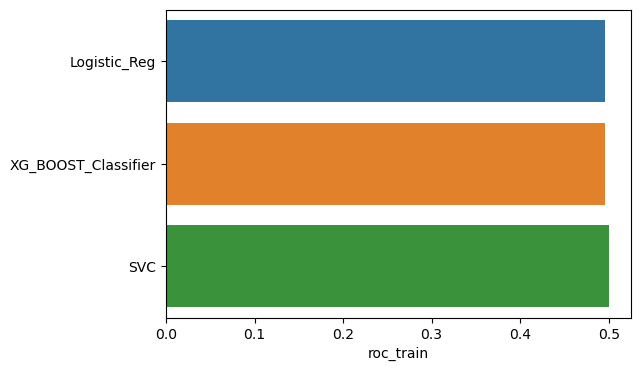

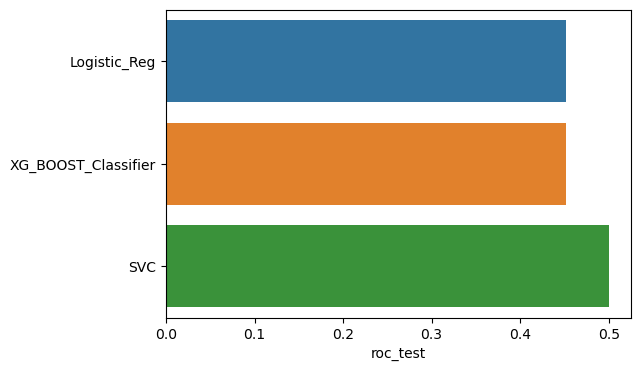

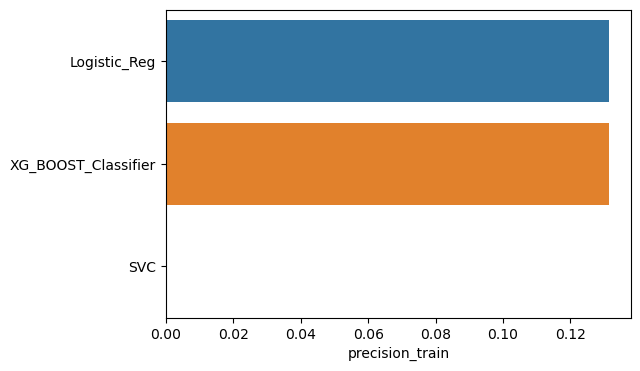

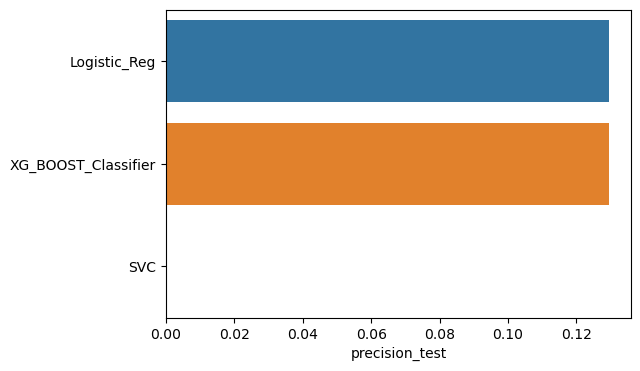

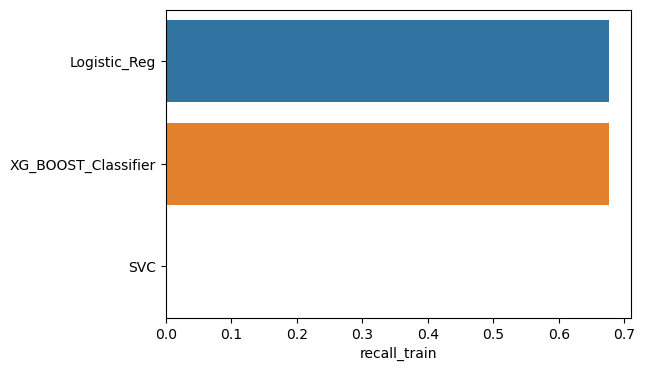

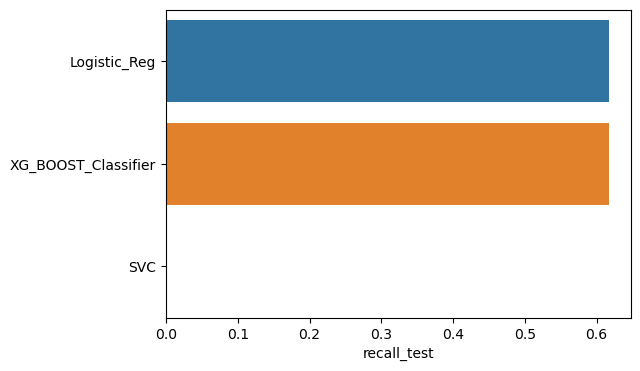

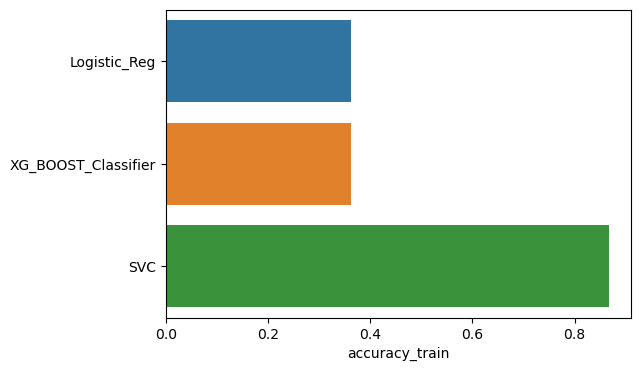

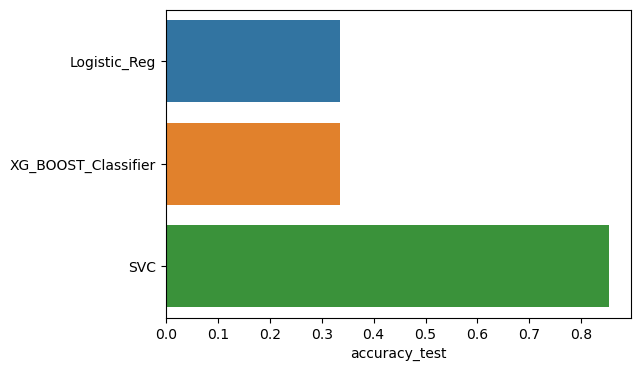

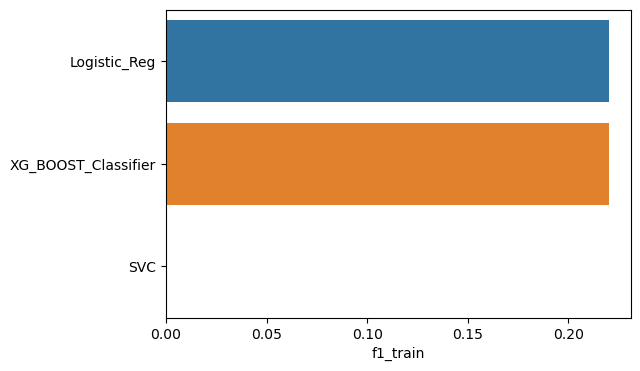

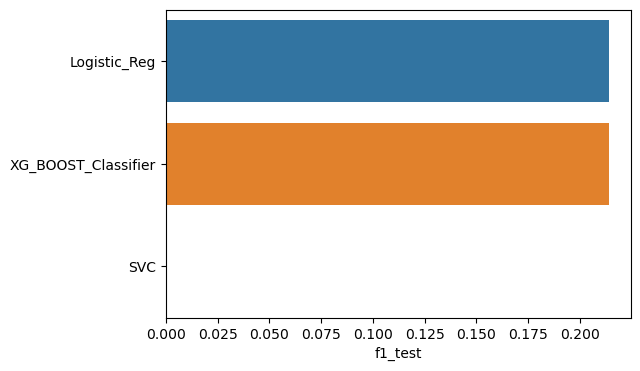

In [58]:
def barplot(cols):
    plt.figure(figsize = (6,4))
    sns.barplot(data = df_reg ,y = df_reg.index , x = cols)
    plt.show()

for i in df_reg.columns:
    barplot(i)

# CONCLUSION

From the above shown barplot and df_reg matrix it is clear that SVC (Support Vector Classifier) is performing
best with the 83% accuracy score